In [12]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.initializers import HeNormal, GlorotNormal
from livelossplot import PlotLossesKeras

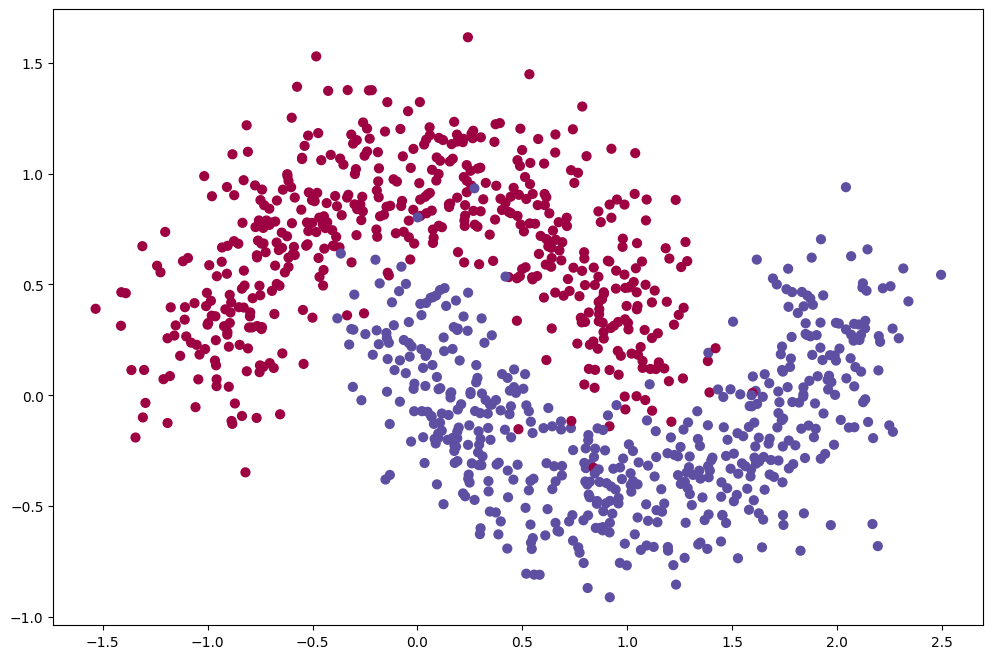

In [13]:
# Create moons dataset.

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

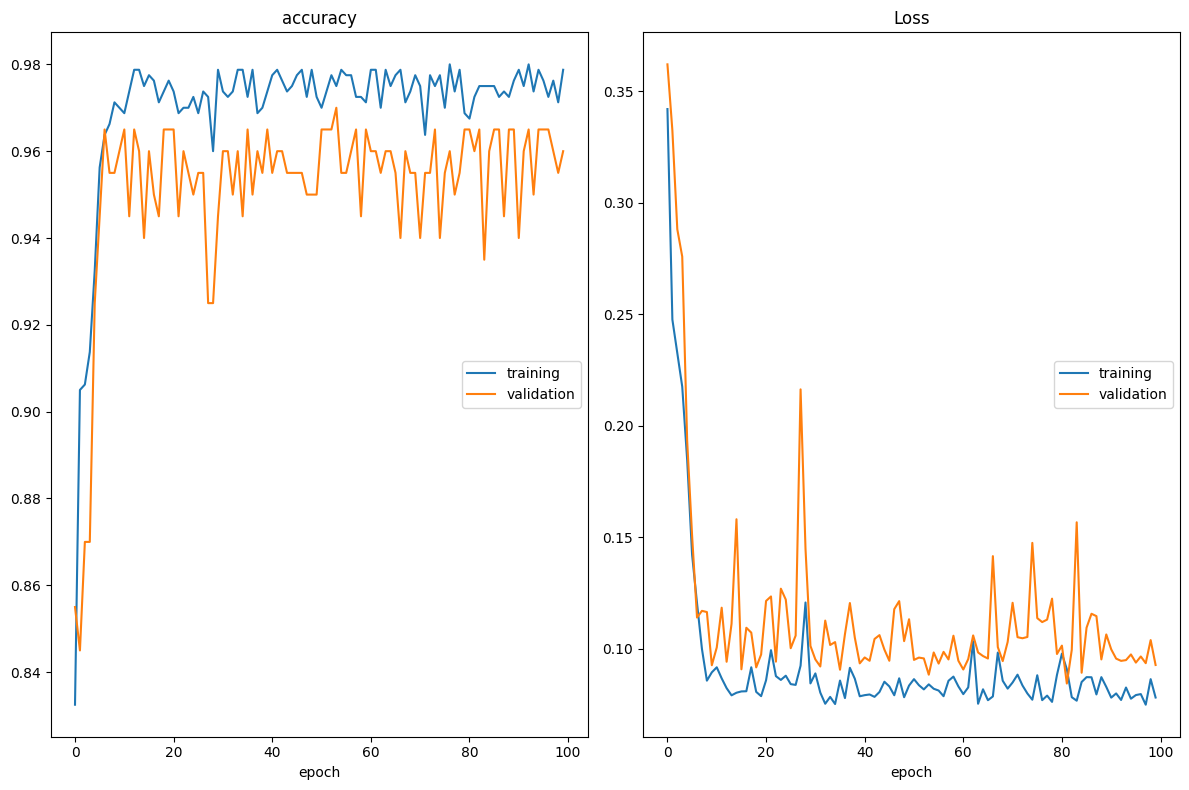

accuracy
	training         	 (min:    0.832, max:    0.980, cur:    0.979)
	validation       	 (min:    0.845, max:    0.970, cur:    0.960)
Loss
	training         	 (min:    0.075, max:    0.342, cur:    0.078)
	validation       	 (min:    0.084, max:    0.362, cur:    0.093)
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9896 - loss: 0.0583 - val_accuracy: 0.9600 - val_loss: 0.0926
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/ste

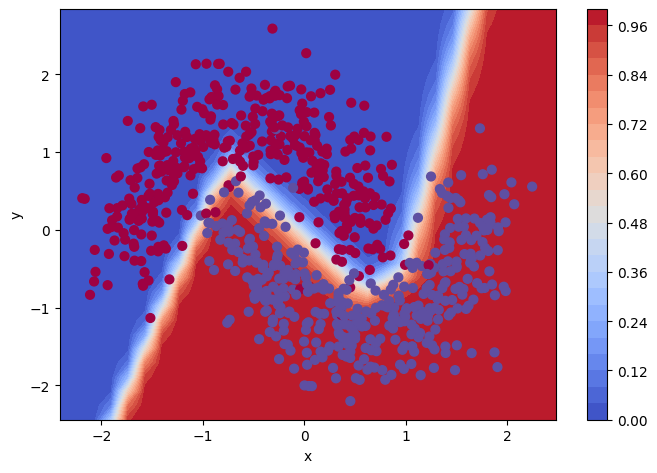

In [14]:
# Escalar los datos
scaler = StandardScaler()
# Dividir el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Crear el modelo secuencial
random.seed(38)
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='relu'))  # Capa oculta con 4 neuronas y activación 'sigmoid'
model.add(Dense(1, activation='sigmoid'))  # Capa de salida con activación 'sigmoid'

# Compilar el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)  # Aquí se especifica el learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(
    x_train, y_train,
    validation_data=[x_test, y_test],
    epochs=100, verbose=1,
    callbacks=[PlotLossesKeras()]
)

# Función para dibujar la región de decisión
def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap=plt.cm.coolwarm, vmin=0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

# Función para predecir usando el modelo
def pred_fun(model, x1, x2):
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

# Dibujar la región de decisión
plt.figure(figsize=(8, 16/3))
plot_decision_region(model, x_train, pred_fun)

# Dibujar los datos originales
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.show()

Las métricas del mejor modelo secuencual de redes neuronales obtenido, son las siguientes:

| Base | Accuracy | Pédida|
| --- | --- | --- |
| Entrenamiento | 0,97 | 0,050 |
| Validación | 0,98 | 0,110 |

El accuracy (precisión) en la base de validación es muy cercana a la de la base de entrenamiento (0.977), lo que indica que el modelo no está sobreajustado y generaliza bien los datos nuevos. 

El loss (pérdida) tanto en entrenamiento como la validación es baja, lo que indica que el modelo no está cometiendo errores significativos.

Un accuracy alto y un loss bajo, indica un buen rendimiento del modelo.

Dicho modelo, se obtuvo con la siguiente configuración:
*   Neuronas: 4
*   Capas: 1
*   Épocas: 100
*   Función de activación para la capa de entrada: relu
*   Función de activación para la capa de salida: sigmoid (adecuada para clasificación binaria)
*   Optimizador: Adam (sin definición de betas)
*   Learning rate: 0,1
*   Sin kernel para inicialización de pesos
*   Sin Dropout
*   Sin BackNormalization

---

Otros modelos se generaron, considerando configuraciones diferentes:
*   Menor número de épocas (30)
*   Funcionaes de activación para la capa de entrada (tanh y sigmoid)
*   Optimizador SGD
*   Optimizador Adam con otros valores de learning rate (0,001 y 0,01)
*   Optimizador Adam con definición de betas
*   Kernel de inicialización HeNormal y GlorotNormal
*   Con Dropout
*   Con BackNormalization

Sin embargo, las métricas indicaban accuracy más bajos y loss más altos, lo que indica un rendimiento inferior al del modelo seleccionado.
